In [1]:
#coding:utf-8
'''
图像增强算法实现
https://blog.csdn.net/dcrmg/article/details/53677739
'''
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data

In [2]:
src = cv2.cvtColor(cv2.imread('datas/dark.jpg'),cv2.COLOR_BGR2RGB)

In [5]:
#彩色图像的直方图均衡化
channels = cv2.split(src)
for i in range(len(channels)):
    channels[i] = cv2.equalizeHist(channels[i])
dst = cv2.merge(channels)

Text(0.5,1,'DST-equalizeHist')

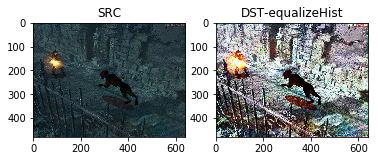

In [7]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('DST-equalizeHist')

In [8]:
#基于拉普拉斯算子的图像增强
kernel = np.array([0, -1, 0, 0, 5, 0, 0, -1, 0]).reshape((3,3))
dst = cv2.filter2D(src,-1,kernel)

Text(0.5,1,'DST-Laplace')

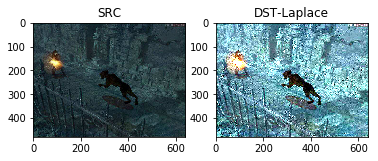

In [9]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('DST-Laplace')

In [20]:
#对数Log变换的图像增强
dst_log = np.zeros(src.shape,dtype=np.float32)
rows,cols,_ = src.shape
for i in range(rows):
    for j in range(cols):
        r = src[i,j,0]
        g = src[i,j,1]
        b = src[i,j,2]
        l_r = np.log(1 + r)
        l_g = np.log(1 + g)
        l_b = np.log(1 + b)
        dst_log[i,j] = (l_r,l_g,l_b)
dst_log = cv2.normalize(dst_log,0,255) * 255
dst_log = cv2.convertScaleAbs(dst_log)


Text(0.5,1,'DST-LOG')

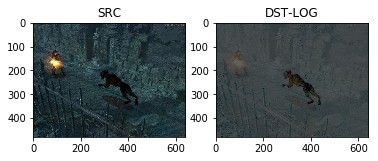

In [19]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst_log)
plt.title('DST-LOG')

In [23]:
#对数Log变换的图像增强(优化)
src_float32 = np.float32(src)
dst_float32 = np.log(src_float32 + 1)
dst_float32 = cv2.normalize(dst_float32,0,255) * 255
dst_float32 = cv2.convertScaleAbs(dst_float32)


Text(0.5,1,'DST-LOG')

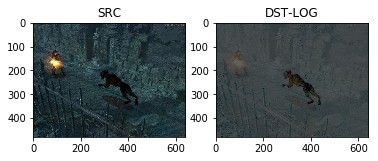

In [24]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst_float32)
plt.title('DST-LOG')

In [26]:
#基于伽马变换的图像增强
gamma_dst = src_float32 ** 3
gamma_dst = cv2.normalize(gamma_dst,0,255) * 255
gamma_dst = cv2.convertScaleAbs(gamma_dst)

Text(0.5,1,'DST-Gamma')

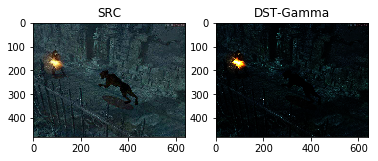

In [27]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(gamma_dst)
plt.title('DST-Gamma')